In [181]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

# training set
train_original = pd.read_csv("/kaggle/input/titanic/train.csv")
# test set
test_dt = pd.read_csv("/kaggle/input/titanic/test.csv")

In [182]:
train_original.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [183]:
train_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


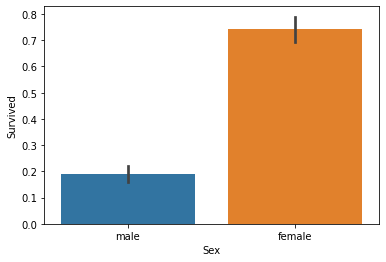

In [184]:
#Exploratory Analysis

sns.barplot(x='Sex', y='Survived', data=train_original)

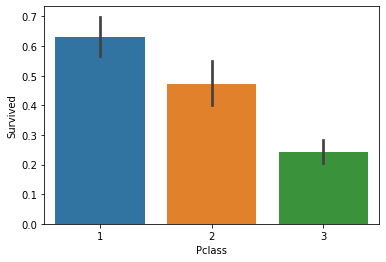

In [185]:
sns.barplot(x='Pclass', y='Survived', data=train_original)

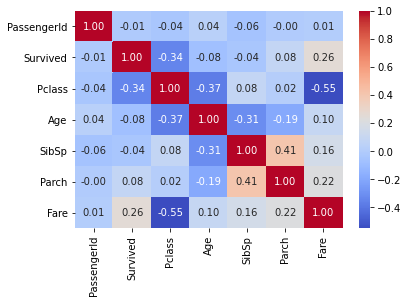

In [186]:
sns.heatmap(train_original.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

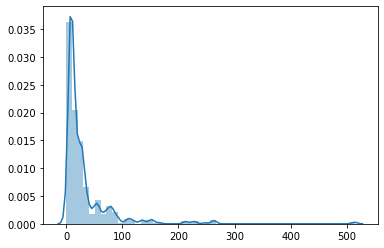

In [187]:
sns.distplot(train_original['Fare'] + train_original['Survived'])

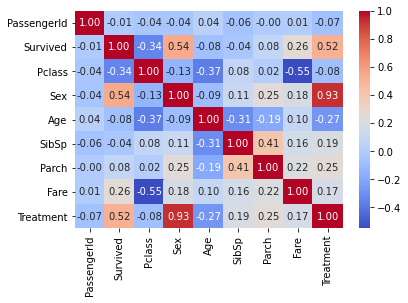

In [188]:
train = train_original.copy()

def getTreatment(name):
    if "mr." in name.lower():
        return 1
    elif "mrs." in name.lower():
        return 2
    elif "miss." in name.lower():
        return 3

def getSex(sex):
    return 2 if "female" in sex else 1

train['Treatment'] = [getTreatment(x) for x in train["Name"]]
train['Sex'] = [getSex(x) for x in train['Sex']]

sns.heatmap(train.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

In [189]:
#if x in train_dt.columns:
#    if x not in ['Survived'] and x not in ['Cabin'] and x not in ['Ticket']:
#        features.append(x)

features = [x for x in train.columns if x not in ['Survived','Cabin','Ticket','PassengerId','Name','Sex']]
print(features)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Treatment']
